# Classify rivers

Classified based on:
- glaciers
- continental drainage
- near (old) mines

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pickle
import numpy as np
import netCDF4 as nc
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import csv
import matplotlib
from matplotlib import colors

### Load ANHA12 runoff file:

In [3]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y2015.nc','r')
# available from 2001- 2017S

In [4]:
# Load structure from sample dataset:
lon_rf = c.variables['nav_lon']
lat_rf = c.variables['nav_lat']
socoefr = c.variables['socoefr']
rf = c.variables['runoff'][8]

In [5]:
rf = np.array(rf)
lon_rf = np.array(lon_rf)
lat_rf = np.array(lat_rf)
rf[rf == 0] = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

<IPython.core.display.Javascript object>


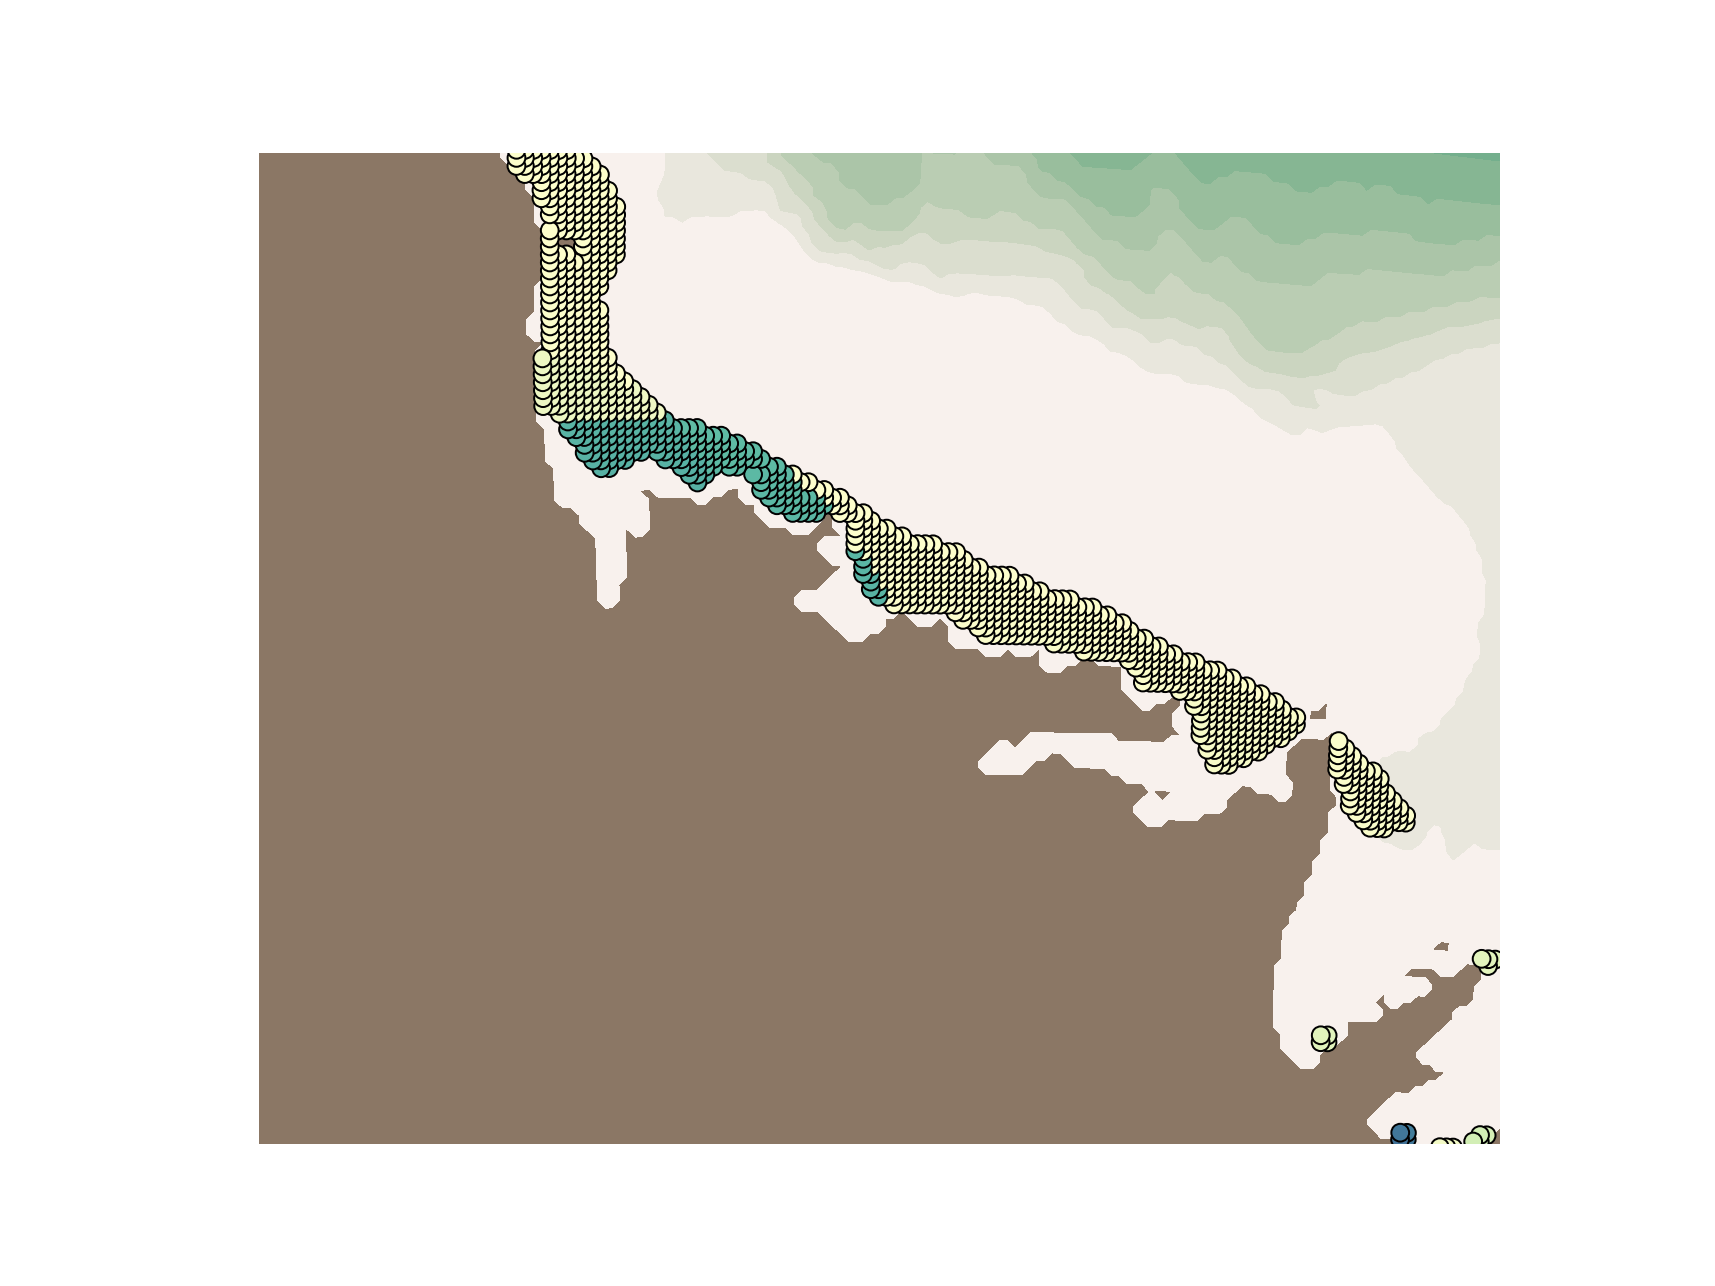

In [9]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','rb'))

x_rf, y_rf  = proj1(lon_rf, lat_rf) 

CS = proj1.scatter(x_rf, y_rf, c=rf,vmin=0,vmax=0.015, s=80, cmap=cmocean.cm.deep, zorder=3, edgecolors='k')
# CBar = plt.colorbar(CS, shrink=0.6)
# CBar.set_label('Runoff [$kg\ m^3 / s$]', fontsize=12)
# CBar.ax.tick_params(axis='y', length=0)

### Classify regions:

Class numbers:
1. Glaciers
2. Continental
3. Mines

#### All other small rivers:

In [6]:
class_river = np.empty(rf.shape)
class_river[:] = np.nan
class_river[~np.isnan(rf)] = 3.0

<IPython.core.display.Javascript object>


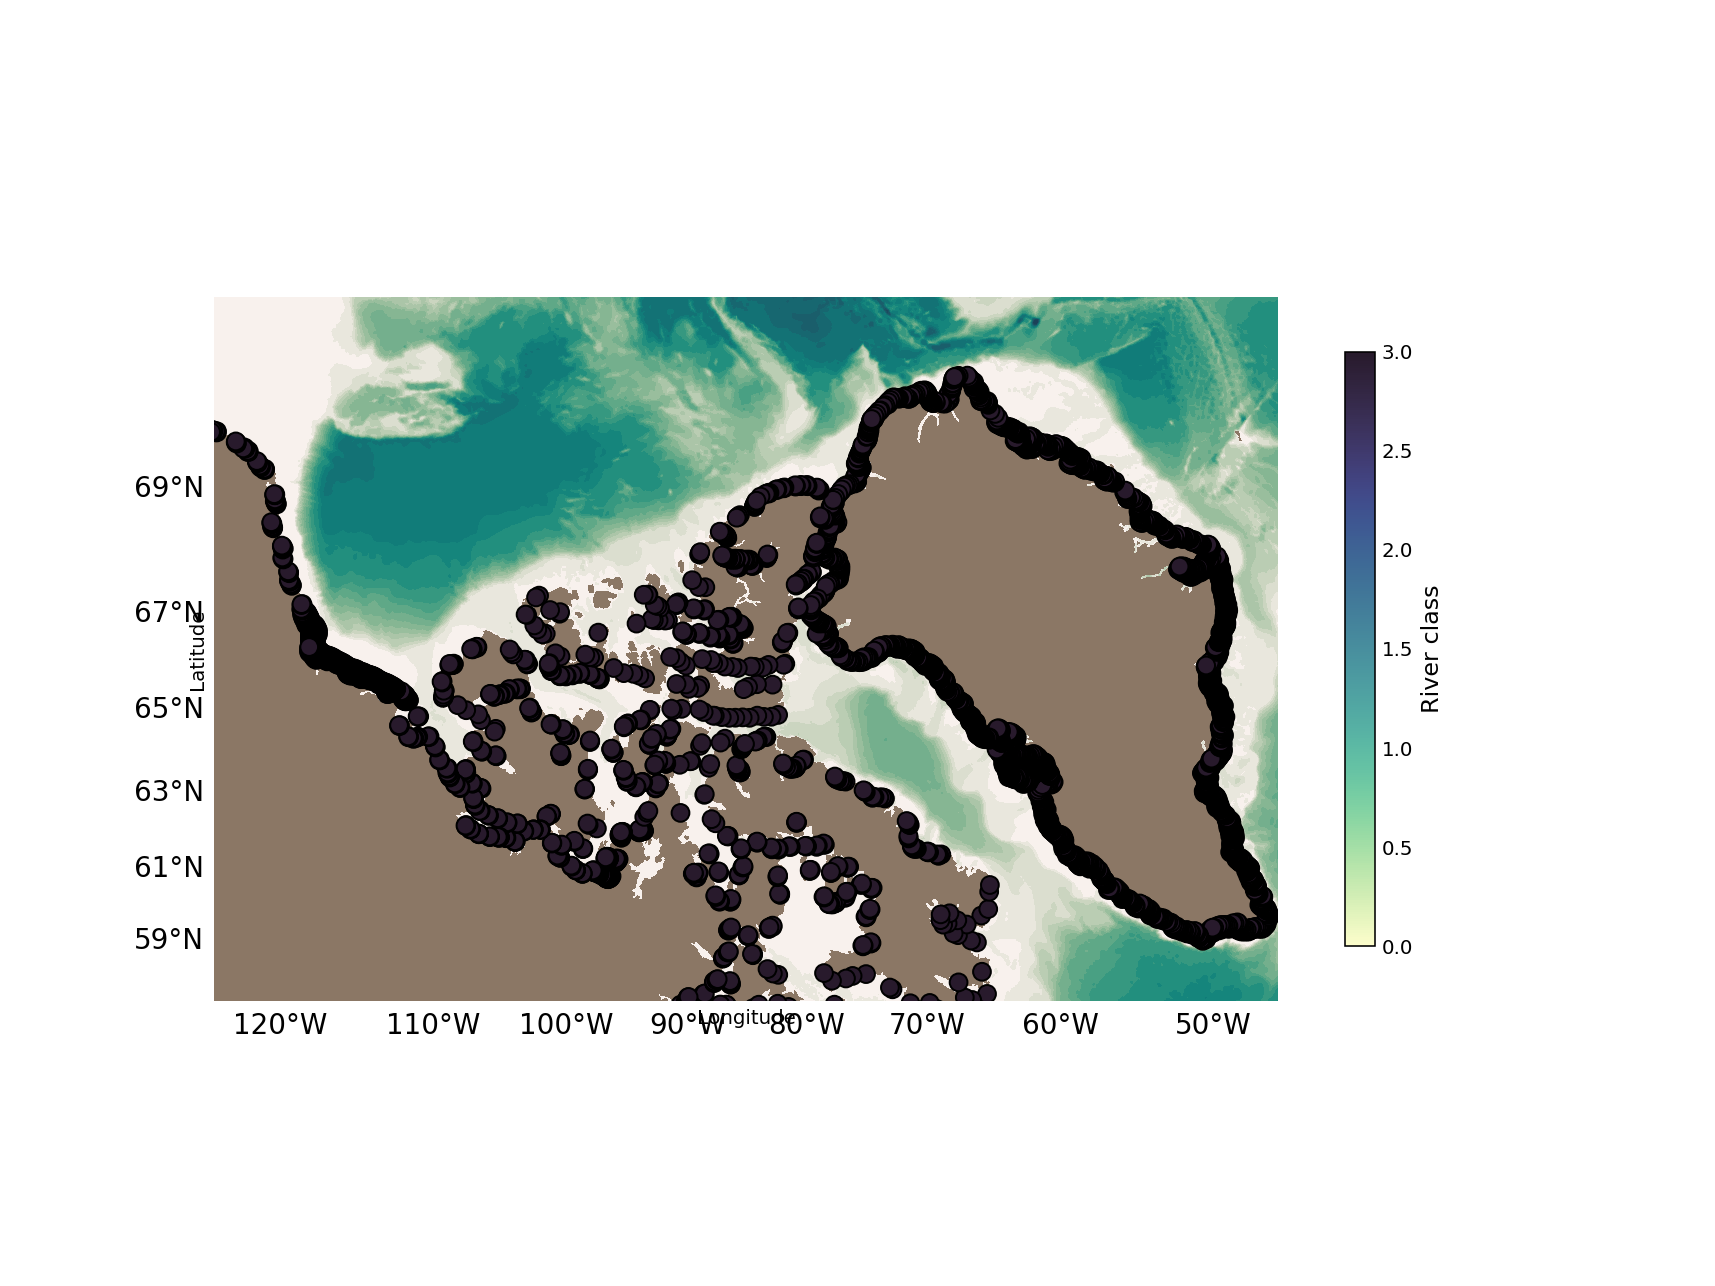

Text(0, 0.5, 'Latitude')

In [11]:
##### Plot the runoff:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','rb'))

x_rf, y_rf  = proj1(lon_rf, lat_rf) 

CS = proj1.scatter(x_rf, y_rf, c=class_river,vmin=0,vmax=3, s=80, cmap=cmocean.cm.deep, zorder=3, edgecolors='k')
CBar = plt.colorbar(CS, shrink=0.6)
CBar.set_label('River class', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

#### Glacial rivers: 

In [7]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 82) & (lat_rf > 73) & (lon_rf < -62) & (lon_rf > -74))
index2 = np.argwhere((lat_rf < 85) & (lat_rf > 76) & (lon_rf < -75) & (lon_rf > -85))
index3 = np.argwhere((lat_rf < 74) & (lat_rf > 71) & (lon_rf < -70) & (lon_rf > -83))
index4 = np.argwhere((lat_rf < 77) & (lat_rf > 73) & (lon_rf < -79) & (lon_rf > -84))
index5 = np.argwhere((lat_rf < 80) & (lat_rf > 78) & (lon_rf < -90) & (lon_rf > -93))
index6 = np.argwhere((lat_rf < 84) & (lat_rf > 79) & (lon_rf < -93) & (lon_rf > -97))
index7 = np.argwhere((lat_rf < 86) & (lat_rf > 73) & (lon_rf < -40) & (lon_rf > -62))

In [8]:
def classify_glacier(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
#             rf[index[i][0],index[i][1]] = 1.0
            class_river[index[i][0],index[i][1]] = 1.0
    return class_river

In [9]:
class_river = classify_glacier(index1, rf, class_river) #Greenland
class_river = classify_glacier(index2, rf, class_river) #Ellesmere Island
class_river = classify_glacier(index3, rf, class_river) #Baffin Island
class_river = classify_glacier(index4, rf, class_river) #Southern Ellesmere Island
class_river = classify_glacier(index5, rf, class_river) #Western Ellesmere Island
class_river = classify_glacier(index6, rf, class_river) #Western Ellesmere Island
class_river = classify_glacier(index7, rf, class_river) #More of Greenland

#### Continental drainage:

In [10]:
def classify_continental(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
#             rf[index[i][0],index[i][1]] = 2.0
            class_river[index[i][0],index[i][1]] = 2.0
    return class_river

In [11]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 71) & (lat_rf > 67) & (lon_rf < -118) & (lon_rf > -150))
index2 = np.argwhere((lat_rf < 68) & (lat_rf > 67) & (lon_rf < -95) & (lon_rf > -115))
index3 = np.argwhere((lat_rf < 70) & (lat_rf > 67) & (lon_rf < -88) & (lon_rf > -100))
index4 = np.argwhere((lat_rf < 70) & (lat_rf > 65) & (lon_rf < -81) & (lon_rf > -87))
index5 = np.argwhere((lat_rf < 69) & (lat_rf > 65) & (lon_rf < -80) & (lon_rf > -95))
index6 = np.argwhere((lat_rf < 69) & (lat_rf > 67) & (lon_rf < -104) & (lon_rf > -109))
index7 = np.argwhere((lat_rf < 69) & (lat_rf > 68) & (lon_rf < -116) & (lon_rf > -119))
index8 = np.argwhere((lat_rf < 69.2) & (lat_rf > 68) & (lon_rf < -113) & (lon_rf > -116))

In [12]:
class_river = classify_continental(index1, rf, class_river) 
class_river = classify_continental(index2, rf, class_river)
class_river = classify_continental(index3, rf, class_river)
class_river = classify_continental(index4, rf, class_river)
class_river = classify_continental(index5, rf, class_river)
class_river = classify_continental(index6, rf, class_river)
class_river = classify_continental(index7, rf, class_river)
class_river = classify_continental(index8, rf, class_river)

Consistency check:

In [13]:
rf[~np.isnan(rf)].shape

(18818,)

In [14]:
class_river[~np.isnan(class_river)].shape

(18818,)

Combined river classification:
1. Glaciers
2. Continental
3. Other

In [15]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

<IPython.core.display.Javascript object>


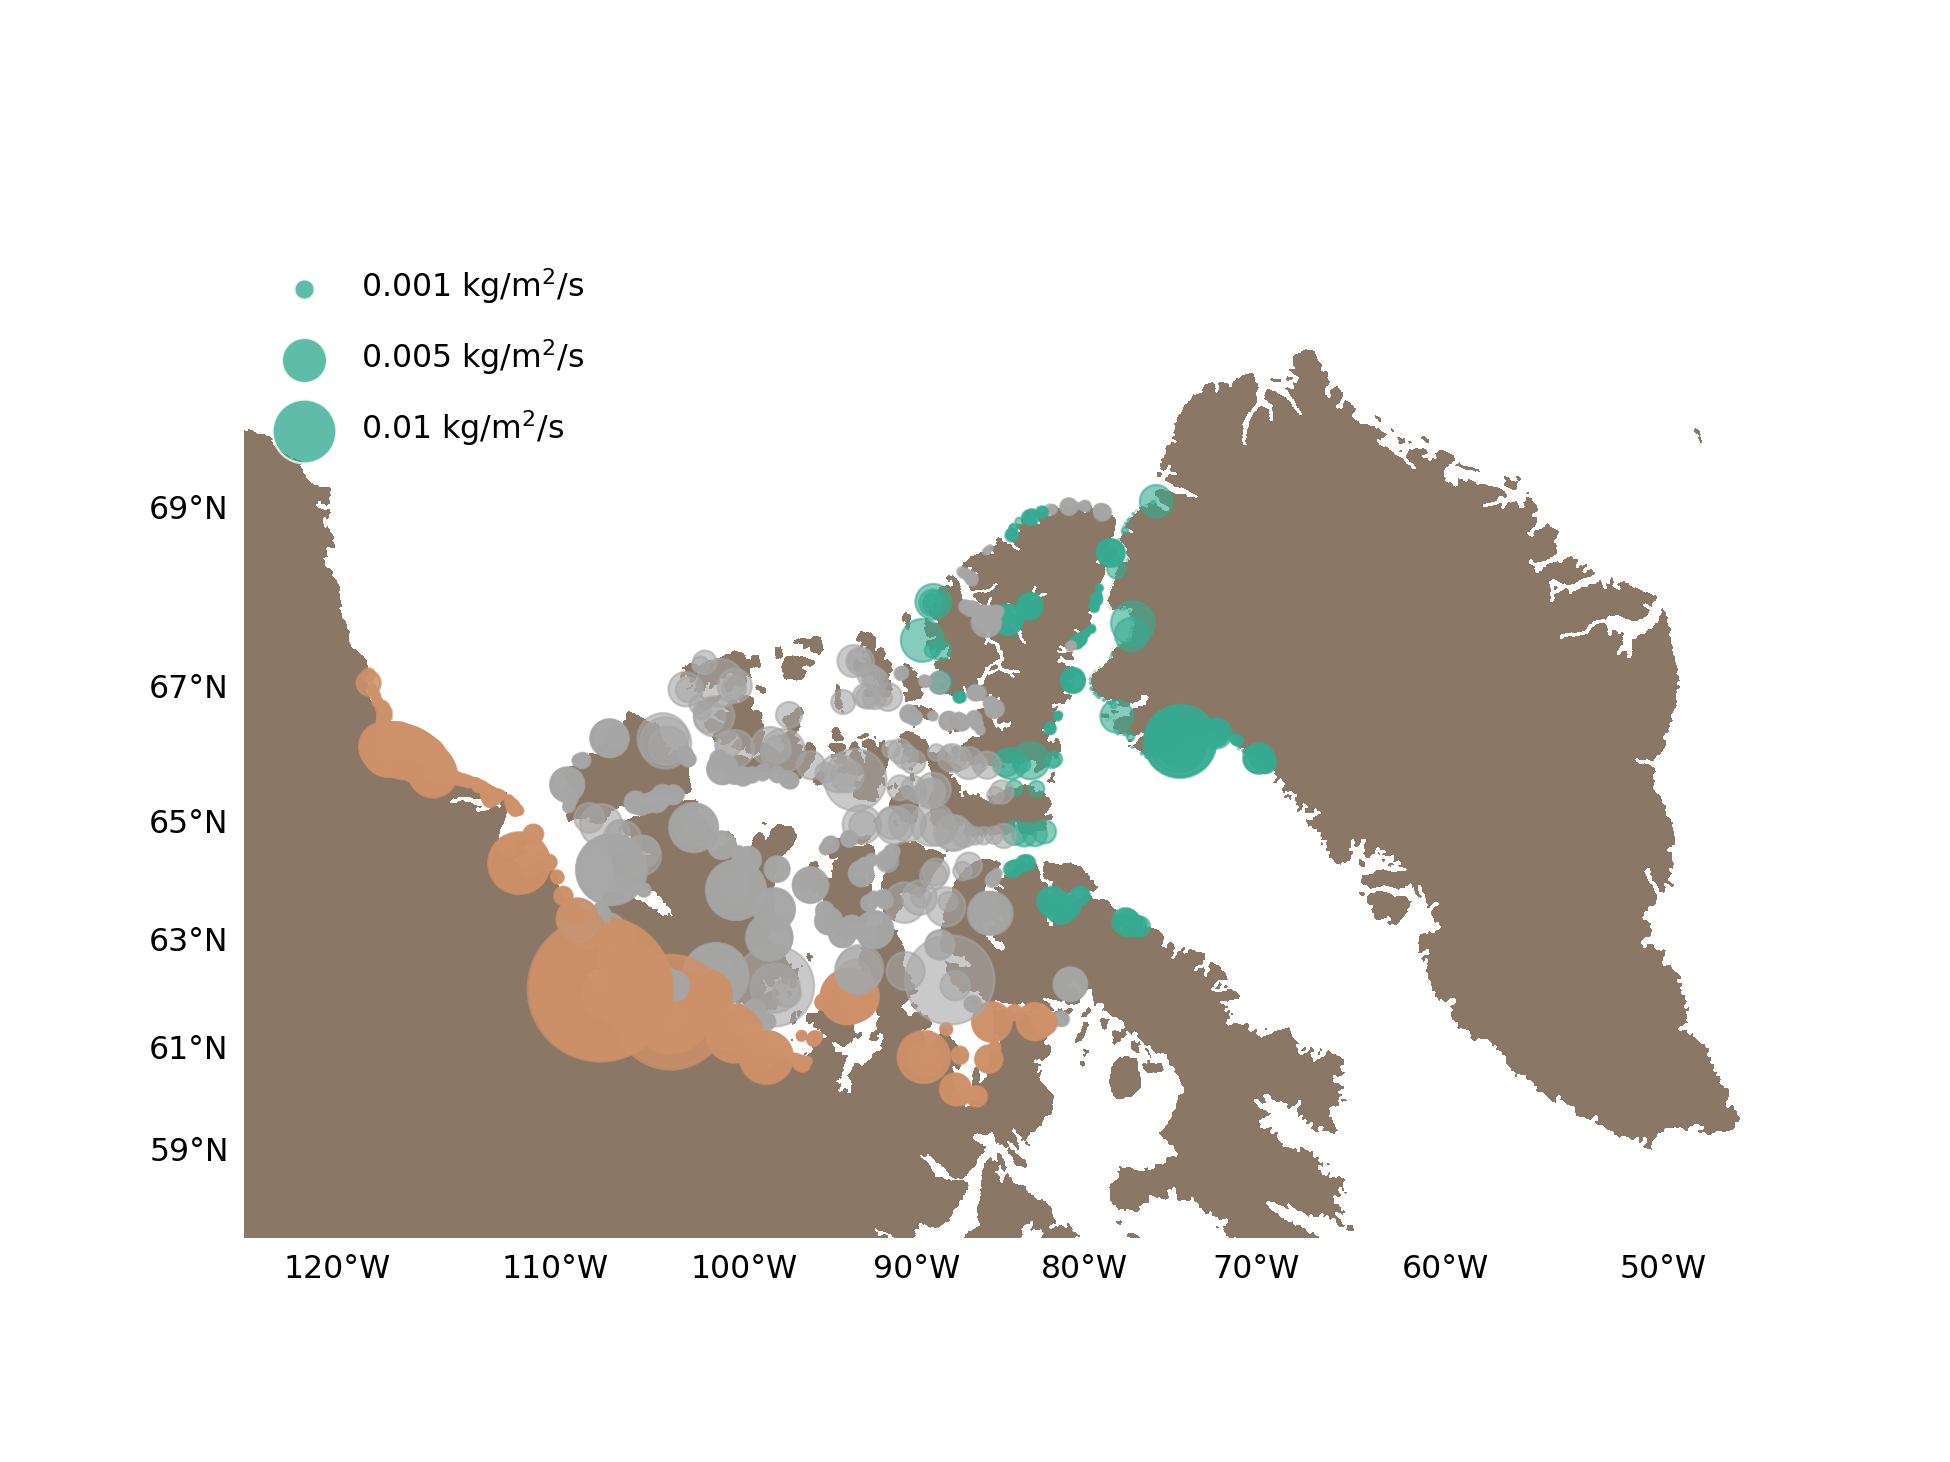

In [16]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x_rf,    y_rf    = proj1(lon_rf, lat_rf)

colormap = colors.ListedColormap(['#36ab92', '#ce9169', '#a6a6a6'])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=class_river[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*8e4, alpha=0.6, cmap=colormap, zorder=3)

for a in [0.001, 0.005, 0.010]:
    proj1.scatter([], [], c='#36ab92', alpha=0.8, s=a*8e4,
                label=str(a) + ' kg/m$^2$/s', edgecolors='w')
    
ax1.legend(scatterpoints=1, frameon=False, labelspacing=1, fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/river-classification.png', bbox_inches='tight', dpi=300)

# Write classification to file:

In [79]:
# Load structure from sample dataset:
BX = c.dimensions['x']
BY = c.dimensions['y']

In [82]:
# Setup the new NetCDF file:
ncda = nc.Dataset('/ocean/brogalla/GEOTRACES/data/river_class_201912.nc', 'w', zlib=True)

ncda.createDimension('x',len(BX))
ncda.createDimension('y',len(BY))

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 2400

In [83]:
rclass = ncda.createVariable('rclass', 'int16', ('y','x'))
rclass.units = 'river class from 1-3'
rclass.long_name = 'river class'
rclass[:] = class_river

In [84]:
ncda.close()